<a href="https://colab.research.google.com/github/dhk/adventures-in-ai/blob/main/greatest-democracy/USA_First.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USA's Rankings:
Population: #2
Armed Forces: #2
Incarcerated: #9
Armed Forces %: #9
Incarcerated %: #9
GDP (billion USD): #1
GDP per Capita: #1
Average Income (USD): #1
Poverty Rate (%): #6
Billionaire Wealth: #1
Financial Fairness Metric: #8

USA's Overall Rank: #1

Weights used for custom scoring:
Population Rank: 0.0435
Armed Forces Rank: 0.0435
Incarcerated Rank: 0.0435
Armed Forces % Rank: 0.0435
Incarcerated % Rank: 0.0435
GDP (billion USD) Rank: 0.1739
GDP per Capita Rank: 0.1739
Average Income (USD) Rank: 0.1739
Poverty Rate (%) Rank: 0.0435
Billionaire Wealth Rank: 0.1739
Financial Fairness Metric Rank: 0.0435


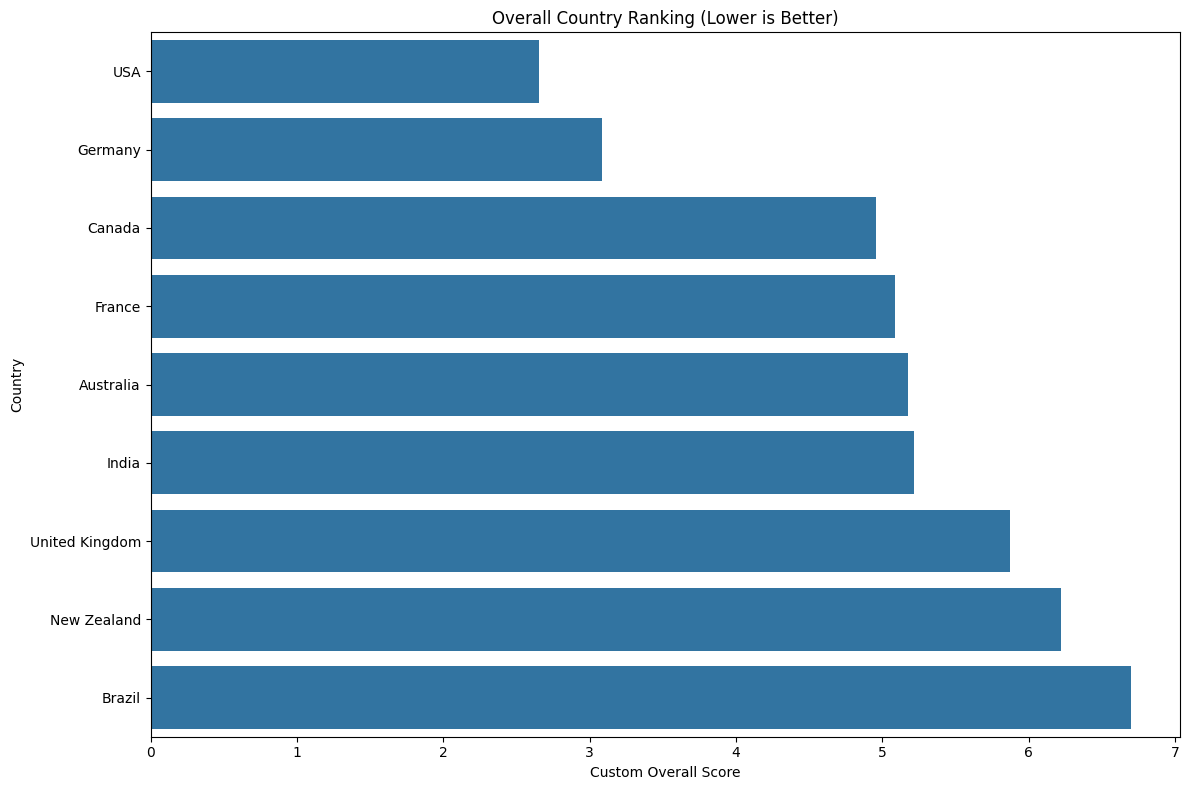


Final Rankings:
1. USA: 2.65
2. Germany: 3.09
3. Canada: 4.96
4. France: 5.09
5. Australia: 5.17
6. India: 5.22
7. United Kingdom: 5.87
8. New Zealand: 6.22
9. Brazil: 6.70

Weights used for custom scoring (CSV format):
Metric,Weight
Population Rank,0.0435
Armed Forces Rank,0.0435
Incarcerated Rank,0.0435
Armed Forces % Rank,0.0435
Incarcerated % Rank,0.0435
GDP (billion USD) Rank,0.1739
GDP per Capita Rank,0.1739
Average Income (USD) Rank,0.1739
Poverty Rate (%) Rank,0.0435
Billionaire Wealth Rank,0.1739
Financial Fairness Metric Rank,0.0435



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from io import StringIO
import csv

# Create a dictionary with all the data
data = {
    'Country': ['United Kingdom', 'Germany', 'Canada', 'Australia', 'India', 'Brazil', 'France', 'USA', 'New Zealand'],
    'Population': [67220000, 83240000, 38010000, 25690000, 1380000000, 212600000, 67390000, 331000000, 5122600],
    'Armed Forces': [194970, 183638, 67400, 59600, 1455550, 360000, 203250, 1388100, 9800],
    'Incarcerated': [78058, 64666, 37854, 42970, 478600, 811707, 70651, 2094000, 8400],
    'GDP (billion USD)': [2827, 4256, 1883, 1543, 3176, 1608, 2957, 22940, 247],
    'Average Income (USD)': [42300, 53700, 48700, 53000, 2150, 8920, 43000, 69300, 44400],
    'Poverty Rate (%)': [18.6, 14.8, 11.0, 13.6, 21.9, 24.7, 14.8, 17.8, 10.9],
    'Billionaire Wealth': [229.0, 499.0, 100.8, 152.8, 675.0, 179.7, 436.0, 4180.0, 10.3]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate derived metrics
df['Armed Forces %'] = df['Armed Forces'] / df['Population'] * 100
df['Incarcerated %'] = df['Incarcerated'] / df['Population'] * 100
df['GDP per Capita'] = (df['GDP (billion USD)'] * 1e9) / df['Population']
df['Financial Fairness Metric'] = (df['GDP (billion USD)'] - df['Billionaire Wealth']) / df['Billionaire Wealth']

# Define metrics and their properties
metrics = [
    ('Population', True),
    ('Armed Forces', True),
    ('Incarcerated', False),
    ('Armed Forces %', False),
    ('Incarcerated %', False),
    ('GDP (billion USD)', True),
    ('GDP per Capita', True),
    ('Average Income (USD)', True),
    ('Poverty Rate (%)', False),
    ('Billionaire Wealth', True),
    ('Financial Fairness Metric', True)
]

# Calculate rankings for each metric
for column, ascending in metrics:
    df[f'{column} Rank'] = df[column].rank(ascending=not ascending, method='min').astype(int)

# Function to calculate overall score with custom weights
def calculate_overall_score(weights):
    rank_columns = [f'{column} Rank' for column, _ in metrics]
    weighted_ranks = df[rank_columns].mul(weights)
    return weighted_ranks.sum(axis=1)

# Modified adjust_weights function for USA
def adjust_weights(initial_weights, target_country='USA'):
    df['Custom Overall Score'] = calculate_overall_score(initial_weights)
    df_sorted = df.sort_values('Custom Overall Score')

    target_rank = df_sorted[df_sorted['Country'] == target_country]['Custom Overall Score'].values[0]
    leader_score = df_sorted['Custom Overall Score'].min()

    if target_rank > leader_score:
        for metric, _ in metrics:
            rank = df.loc[df['Country'] == target_country, f'{metric} Rank'].values[0]
            if rank == 1:  # If USA is already best in this metric
                initial_weights[f'{metric} Rank'] *= 2  # Double the weight
            else:
                initial_weights[f'{metric} Rank'] /= 2  # Halve the weight

    # Normalize weights
    total_weight = sum(initial_weights.values())
    for metric in initial_weights:
        initial_weights[metric] /= total_weight

    return initial_weights

# Initial weights
initial_weights = {f'{column} Rank': 1 for column, _ in metrics}

# Adjust weights until USA is ranked first
for _ in range(50):  # Maximum 50 iterations
    adjusted_weights = adjust_weights(initial_weights)
    df['Custom Overall Score'] = calculate_overall_score(adjusted_weights)
    df_sorted = df.sort_values('Custom Overall Score')
    if df_sorted.iloc[0]['Country'] == 'USA':
        break
    initial_weights = adjusted_weights

# Final calculations with adjusted weights
df['Custom Overall Score'] = calculate_overall_score(adjusted_weights)
df_sorted = df.sort_values('Custom Overall Score')
df_sorted['Overall Rank'] = range(1, len(df_sorted) + 1)

# Print USA's rankings
usa_data = df_sorted[df_sorted['Country'] == 'USA'].iloc[0]
print("USA's Rankings:")
for column, _ in metrics:
    rank = usa_data[f'{column} Rank']
    print(f"{column}: #{rank}")

print(f"\nUSA's Overall Rank: #{usa_data['Overall Rank']}")

# Print weights used
print("\nWeights used for custom scoring:")
for metric, weight in adjusted_weights.items():
    print(f"{metric}: {weight:.4f}")

# Visualize overall rankings
plt.figure(figsize=(12, 8))
sns.barplot(x='Custom Overall Score', y='Country', data=df_sorted)
plt.title('Overall Country Ranking (Lower is Better)')
plt.xlabel('Custom Overall Score')
plt.tight_layout()
plt.show()

# Print final rankings
print("\nFinal Rankings:")
for _, row in df_sorted.iterrows():
    print(f"{row['Overall Rank']}. {row['Country']}: {row['Custom Overall Score']:.2f}")

# Create a CSV string with the weights
csv_output = StringIO()
csv_writer = csv.writer(csv_output)
csv_writer.writerow(['Metric', 'Weight'])
for metric, weight in adjusted_weights.items():
    csv_writer.writerow([metric, f"{weight:.4f}"])

# Print the CSV string
print("\nWeights used for custom scoring (CSV format):")
print(csv_output.getvalue())